   Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecording  WebsiteTraffic

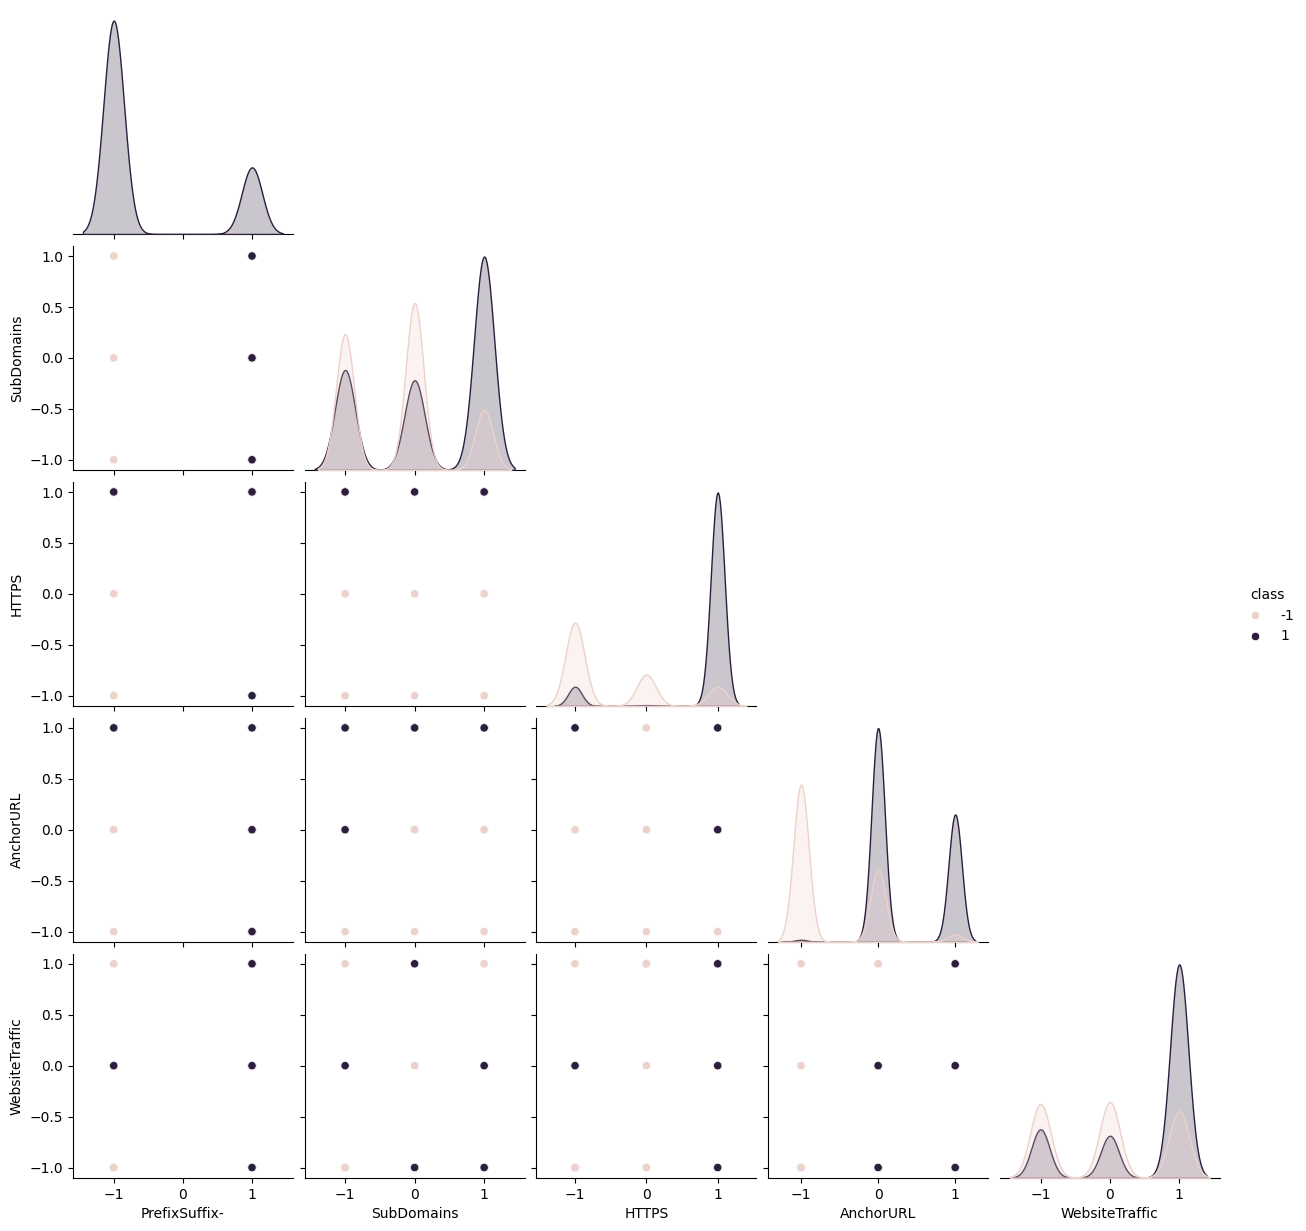

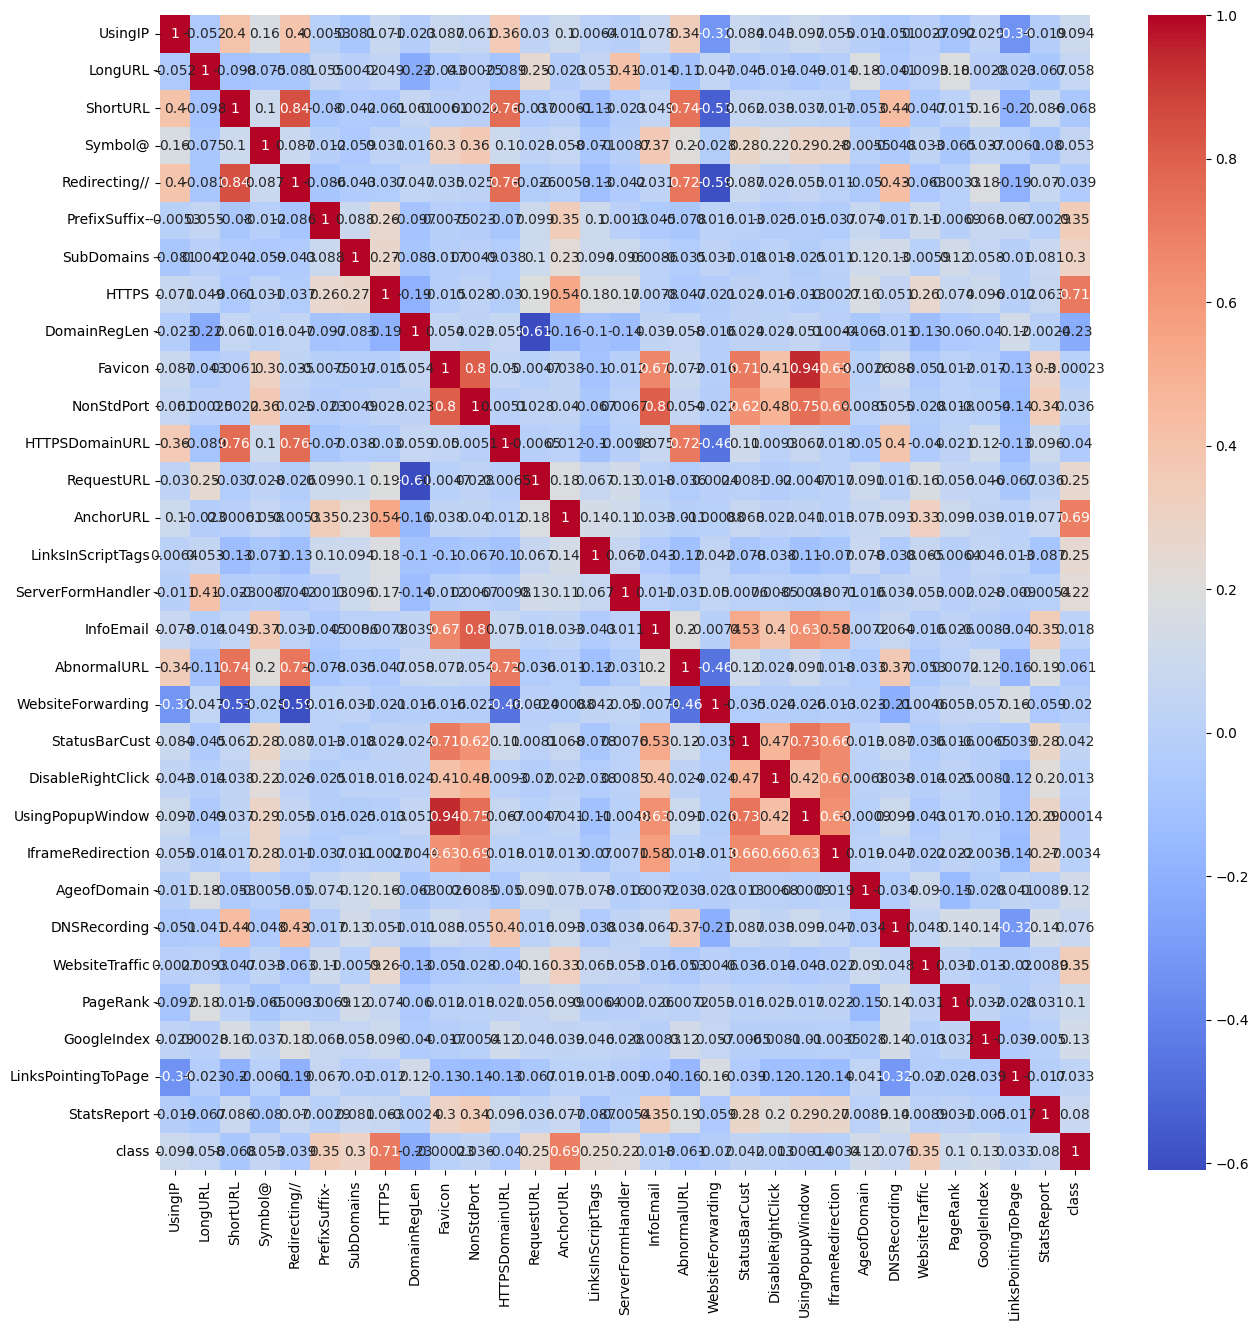

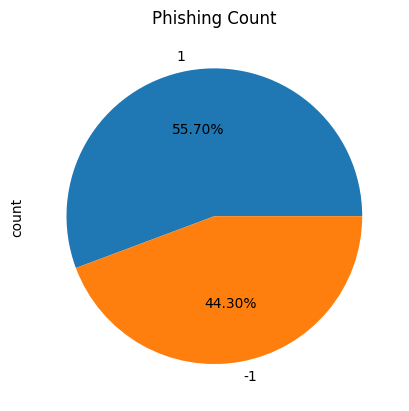

(8843, 30) (8843,) (2211, 30) (2211,)
Gradient Boosting Classifier : Accuracy on training Data: 0.990
Gradient Boosting Classifier : Accuracy on test Data: 0.973

Gradient Boosting Classifier : f1_score on training Data: 0.991
Gradient Boosting Classifier : f1_score on test Data: 0.976

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.984

Gradient Boosting Classifier : Precision on training Data: 0.988
Gradient Boosting Classifier : Precision on test Data: 0.968
                    Model  Accuracy  F1 Score  Recall  Precision
0     Logistic Regression     0.934     0.942   0.955      0.929
1     K-Nearest Neighbors     0.953     0.958   0.964      0.953
2  Support Vector Machine     0.967     0.971   0.980      0.963
3             Naive Bayes     0.605     0.454   0.294      0.995
4           Decision Tree     0.951     0.956   0.956      0.956
5           Random Forest     0.957     0.962   0.974      0.949
6       Gr

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Loading data into dataframe
data = pd.read_csv("phishing.csv")
print(data.head())

# Information about the dataset
print(data.info())

# Shape of dataframe
print(data.shape)

# Listing the features of the dataset
print(data.columns)

# nunique value in columns
print(data.nunique())

# Dropping index column if it exists
if 'Index' in data.columns:
    data = data.drop(['Index'], axis=1)

# Description of dataset
print(data.describe().T)

# Pairplot for selected features
df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS', 'AnchorURL', 'WebsiteTraffic', 'class']]
sns.pairplot(data=df, hue="class", corner=True)
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Phishing Count in pie chart
data['class'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

# Splitting the dataset into dependent and independent features
X = data.drop(["class"], axis=1)
y = data["class"]

# Splitting the dataset into train and test sets: 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

# Function to call for storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_score.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))

# Logistic Regression with GridSearchCV
param_grid_log = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
log = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_log, cv=5)
log.fit(X_train, y_train)
best_log = log.best_estimator_
y_train_log = best_log.predict(X_train)
y_test_log = best_log.predict(X_test)
acc_train_log = metrics.accuracy_score(y_train, y_train_log)
acc_test_log = metrics.accuracy_score(y_test, y_test_log)
f1_score_train_log = metrics.f1_score(y_train, y_train_log)
f1_score_test_log = metrics.f1_score(y_test, y_test_log)
recall_score_train_log = metrics.recall_score(y_train, y_train_log)
recall_score_test_log = metrics.recall_score(y_test, y_test_log)
precision_score_train_log = metrics.precision_score(y_train, y_train_log)
precision_score_test_log = metrics.precision_score(y_test, y_test_log)
storeResults('Logistic Regression', acc_test_log, f1_score_test_log, recall_score_test_log, precision_score_test_log)

# K-Nearest Neighbors with GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn.fit(X_train, y_train)
best_knn = knn.best_estimator_
y_train_knn = best_knn.predict(X_train)
y_test_knn = best_knn.predict(X_test)
acc_train_knn = metrics.accuracy_score(y_train, y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test, y_test_knn)
f1_score_train_knn = metrics.f1_score(y_train, y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test, y_test_knn)
recall_score_train_knn = metrics.recall_score(y_train, y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test, y_test_knn)
precision_score_train_knn = metrics.precision_score(y_train, y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test, y_test_knn)
storeResults('K-Nearest Neighbors', acc_test_knn, f1_score_test_knn, recall_score_test_knn, precision_score_test_knn)

# Support Vector Machine with GridSearchCV
param_grid_svc = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
svc.fit(X_train, y_train)
best_svc = svc.best_estimator_
y_train_svc = best_svc.predict(X_train)
y_test_svc = best_svc.predict(X_test)
acc_train_svc = metrics.accuracy_score(y_train, y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test, y_test_svc)
f1_score_train_svc = metrics.f1_score(y_train, y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test, y_test_svc)
recall_score_train_svc = metrics.recall_score(y_train, y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test, y_test_svc)
precision_score_train_svc = metrics.precision_score(y_train, y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test, y_test_svc)
storeResults('Support Vector Machine', acc_test_svc, f1_score_test_svc, recall_score_test_svc, precision_score_test_svc)

# Naive Bayes (no hyperparameters to tune)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)
acc_train_nb = metrics.accuracy_score(y_train, y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test, y_test_nb)
f1_score_train_nb = metrics.f1_score(y_train, y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test, y_test_nb)
recall_score_train_nb = metrics.recall_score(y_train, y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test, y_test_nb)
precision_score_train_nb = metrics.precision_score(y_train, y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test, y_test_nb)
storeResults('Naive Bayes', acc_test_nb, f1_score_test_nb, recall_score_test_nb, precision_score_test_nb)

# Decision Tree with GridSearchCV
param_grid_tree = {'max_depth': [3, 5, 7, 10], 'criterion': ['gini', 'entropy']}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5)
tree.fit(X_train, y_train)
best_tree = tree.best_estimator_
y_train_tree = best_tree.predict(X_train)
y_test_tree = best_tree.predict(X_test)
acc_train_tree = metrics.accuracy_score(y_train, y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test, y_test_tree)
f1_score_train_tree = metrics.f1_score(y_train, y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test, y_test_tree)
recall_score_train_tree = metrics.recall_score(y_train, y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test, y_test_tree)
precision_score_train_tree = metrics.precision_score(y_train, y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test, y_test_tree)
storeResults('Decision Tree', acc_test_tree, f1_score_test_tree, recall_score_test_tree, precision_score_test_tree)

# Random Forest with RandomizedSearchCV
param_dist_forest = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}
forest = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist_forest, n_iter=20, cv=5, random_state=42)
forest.fit(X_train, y_train)
best_forest = forest.best_estimator_
y_train_forest = best_forest.predict(X_train)
y_test_forest = best_forest.predict(X_test)
acc_train_forest = metrics.accuracy_score(y_train, y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test, y_test_forest)
f1_score_train_forest = metrics.f1_score(y_train, y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test, y_test_forest)
recall_score_train_forest = metrics.recall_score(y_train, y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test, y_test_forest)
precision_score_train_forest = metrics.precision_score(y_train, y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test, y_test_forest)
storeResults('Random Forest', acc_test_forest, f1_score_test_forest, recall_score_test_forest, precision_score_test_forest)

# Gradient Boosting Classifier with GridSearchCV
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5)
gb.fit(X_train, y_train)
best_gb = gb.best_estimator_
y_train_gb = best_gb.predict(X_train)
y_test_gb = best_gb.predict(X_test)
acc_train_gb = metrics.accuracy_score(y_train, y_train_gb)
acc_test_gb = metrics.accuracy_score(y_test, y_test_gb)
f1_score_train_gb = metrics.f1_score(y_train, y_train_gb)
f1_score_test_gb = metrics.f1_score(y_test, y_test_gb)
recall_score_train_gb = metrics.recall_score(y_train, y_train_gb)
recall_score_test_gb = metrics.recall_score(y_test, y_test_gb)
precision_score_train_gb = metrics.precision_score(y_train, y_train_gb)
precision_score_test_gb = metrics.precision_score(y_test, y_test_gb)
storeResults('Gradient Boosting', acc_test_gb, f1_score_test_gb, recall_score_test_gb, precision_score_test_gb)

# Printing results for Gradient Boosting Classifier
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gb))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gb))
print()
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gb))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gb))
print()
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gb))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gb))
print()
print("Gradient Boosting Classifier : Precision on training Data: {:.3f}".format(precision_score_train_gb))
print("Gradient Boosting Classifier : Precision on test Data: {:.3f}".format(precision_score_test_gb))

# Creating a DataFrame for storing the results
results_df = pd.DataFrame({
    'Model': ML_Model,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall': recall,
    'Precision': precision
})

# Displaying the results
print(results_df)


In [2]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [3]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.942,0.955,0.929
1,K-Nearest Neighbors,0.953,0.958,0.964,0.953
2,Support Vector Machine,0.967,0.971,0.980,0.963
3,Naive Bayes,0.605,0.454,0.294,0.995
4,Decision Tree,0.951,0.956,0.956,0.956
5,Random Forest,0.957,0.962,0.974,0.949
6,Gradient Boosting,0.973,0.976,0.984,0.968


In [4]:
import pickle

# dump information to that file
pickle.dump(gb, open('pickle/models.pkl', 'wb'))